# Exam Agenda

## (a) Focus on filtering (convolution and correlation, blurring/smoothing, noise)
* Motivation - why do we want to apply filters on a dataset?
    * Data usually contains a lot of noise - our job is to minimise it to enforce general patterns
* Correlation - kernels
    * Gaussian kernel
    * Data points close to the current data point are weighed more
    * [0.1, 0.2, 0.4, 0.2, 0.1]
    * Sigma value influences the "smoothness"
* Show results of applying Gaussian kernel to the dataset
* Filters out the noise

# (b) Focus on filtering (derivatives, gradients, edges)
* Derivatives on a clean dataset
    * Detects the edges in the dataset
    * Data changes rapidly (pupils move from one point to another)
    * Involves convolving the data
* Show results of derivatives in x- and y- coordinates
* Gradients
    * Combine the derivatives of x and y coordinates
    * The magnitude increases as there are changes in both coordinates, indicating a pupil movement to a new point
* Show results of the gradients


In [101]:
import filtering_util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # need to show the grid image
from scipy.ndimage import gaussian_filter1d

# Filtering gaze data
This exercise introduces different techniques for processing and analyzing gaze data using filtering. In particular the exercise removing noise and identifying fixations and saccades in the signal. A _fixation_ is defined as an instance with little or no eye movement. A _saccade_ is an eye movement between two fixations as illustrated in [Figure 1](#fix_sacc) for an example (image from [researchGate](https://www.researchgate.net/publication/356796000_TECHNICAL_MANUALS_READING_STRATEGIES_OF_PRIMARY_TEACHER_TRAINESS/figures?lo=1)
).
<div class="has-text-centered">
<figure class="image is-inline-block" id="fix_sacc">

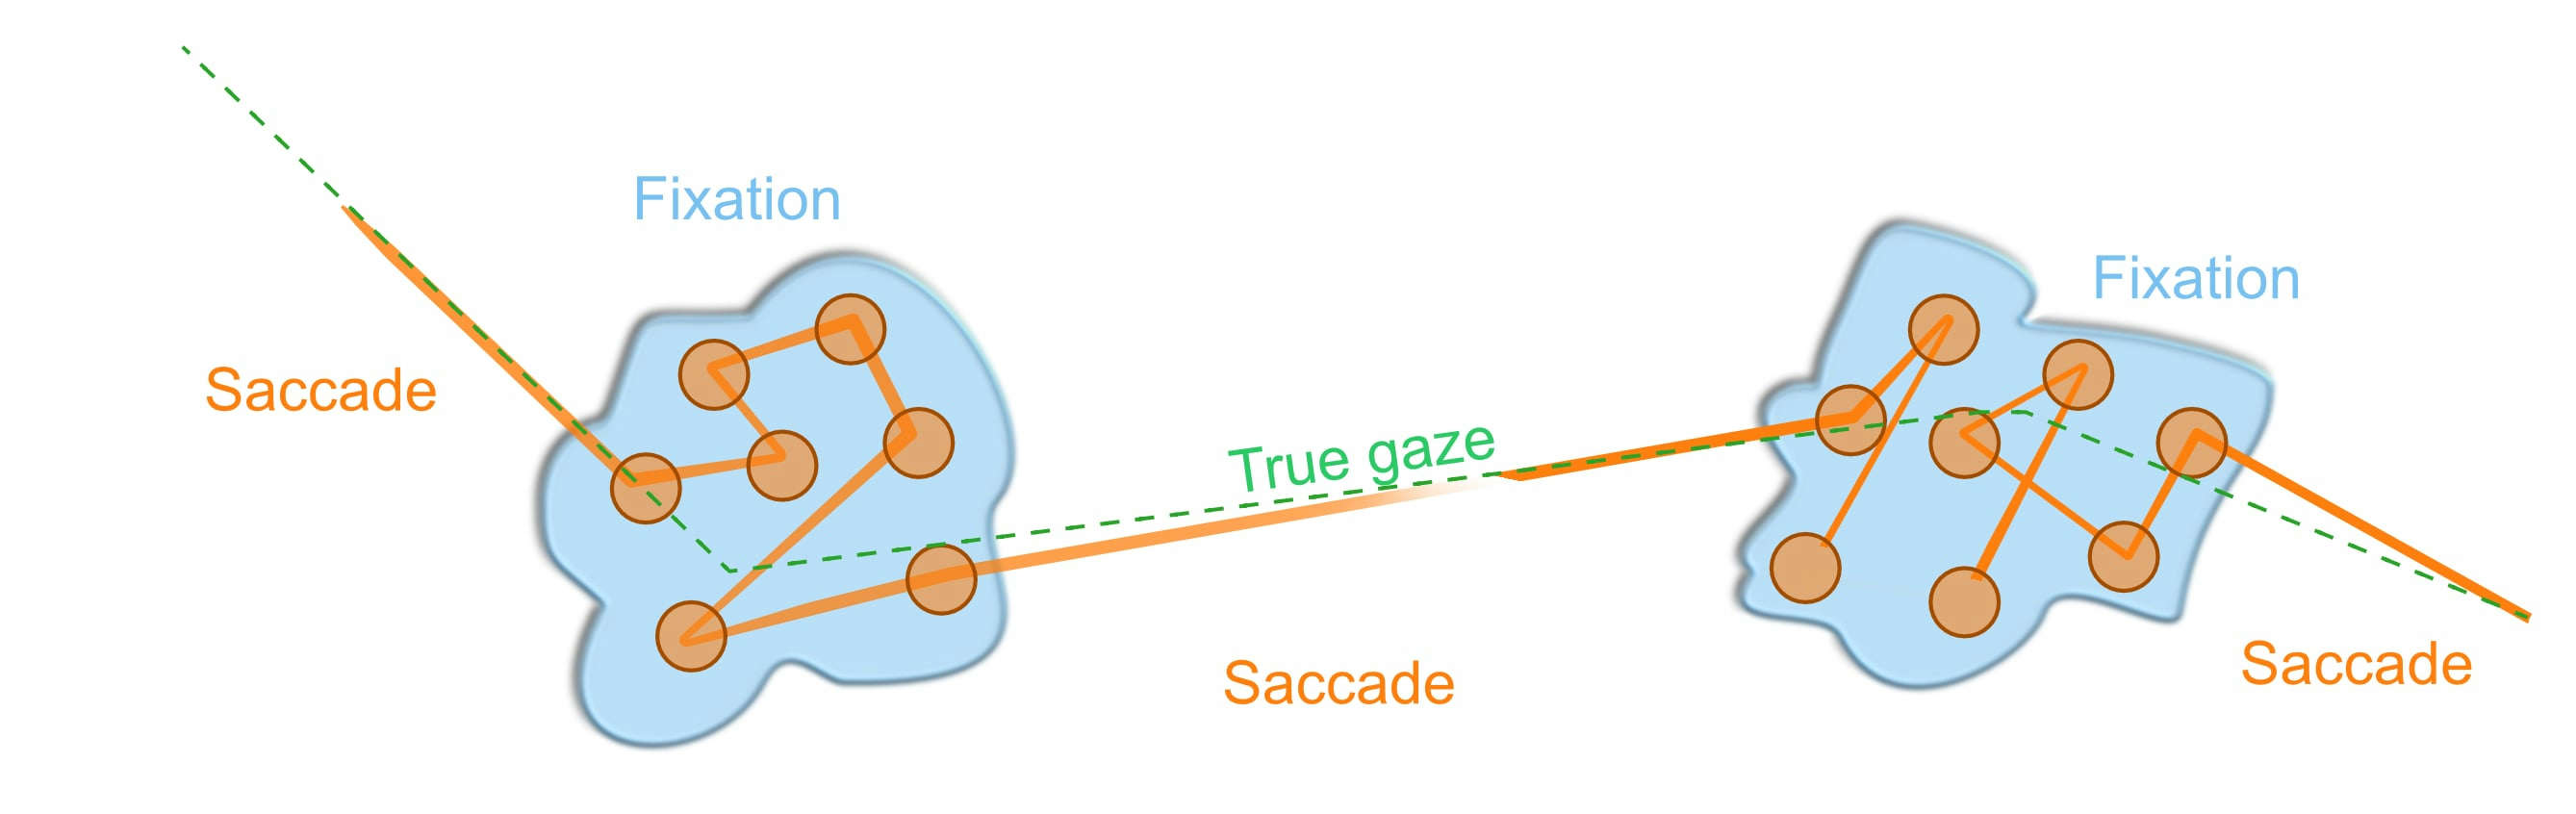

<figcaption class="figure-caption has-text-centered">Figure 1: Fixation and saccades in gaze data.
</figcaption>
</figure>
</div>
The visualizations presented throughout the exercise are based on data collected from `test_subject_3`
 using the `grid`
 pattern.
The exercise contains functions in the `filtering_util.py`
 file to create plots. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#task_load_data">Task 1: Load the data</a>
            </li>
            <li>
            <a href="#task_gauss1">Task 2: Gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss2">Task 3: Implementing gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss3">Task 4: Reflect on applying gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss4">Task 5: Partial derivatives</a>
            </li>
            <li>
            <a href="#partial1">Task 6: Calculate the derivatives</a>
            </li>
            <li>
            <a href="#partial2">Task 7: Derivatives of a signal</a>
            </li>
            <li>
            <a href="#partial3">Task 8: Saccade detection</a>
            </li>
            <li>
            <a href="#partial4">Task 9: Saccade detection</a>
            </li>
            <li>
            <a href="#fixations1">Task 10: Fixation detection</a>
            </li>
            <li>
            <a href="#fixations2">Task 11: Visualization of signals</a>
            </li>
            <li>
            <a href="#fixation3">Task 12: Noise handling during fixations</a>
            </li>
            <li>
            <a href="#fixation4">Task 13: Frame grouping</a>
            </li>
            <li>
            <a href="#results1">Task 14: Analyse results</a>
            </li>
            <li>
            <a href="#results2">Task 15: Reflect</a>
            </li>
            <li>
            <a href="#owndata">Task 16: Combined signal</a>
            </li>
            <li>
            <a href="#combined1">Task 17: Combined signal</a>
            </li>
            <li>
            <a href="#combined2">Task 18: Reflect</a>
            </li>
        </ul>
    </div>
</article>

**Note:** Although the number of tasks is substantial, each requires minimal programming effort, with many tasks primarily necessitating reflection on the outcomes.


---
**Task 1 (easy): Load the data👩‍💻**
1. Run the cell to visualize the `grid`
 pattern of `test_subject_3`
.
**Note:** The code is loading the data from the folder of week 6. Alternatively you can copy the data to the folder of this exercise and change the file path accordingly.




---

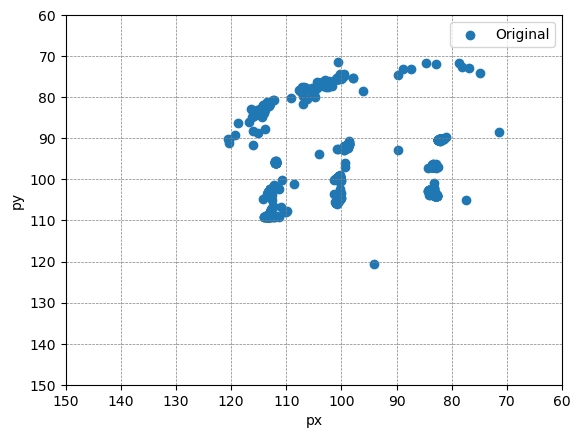

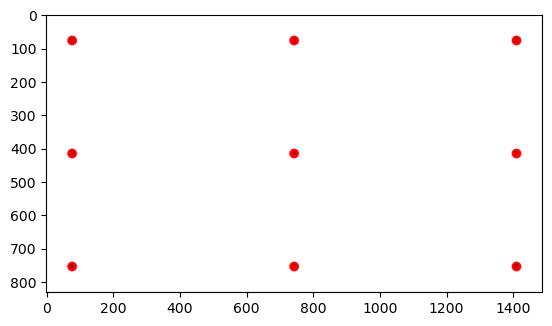

In [102]:
test_subject = 'test_subject_3'
# own_data = 'group-12-rakt'

csv_file =f'../w6/data/output/{test_subject}/grid/pupil_coordinates.csv'

pupil_coor= filtering_util.load_csv1(csv_file)

filtering_util.plot_pupil_coor(pupil_coor['px'], pupil_coor['py'], 'Original')
plt.show()

# Recall what the gaze example with the grid looked like
image = mpimg.imread(f'../w6/data/test_subjects/{test_subject}/test_subject_3_grid_pattern_image.png') 
plt.imshow(image)
plt.show()


The next task involves visualizing the pupil coordinates signals `px`
 and `py`
 for the gaze `grid`
 pattern. In this task, a $1D$ Gaussian filter will be applied to smooth the signals individually. [Figure 2](#gauss) illustrates the Gaussian $1D$ filters and the corresponding filtered signal. The cell below convolves a Gaussian filter to gaze data. 
<div class="has-text-centered">
<figure class="image is-inline-block" id="gauss">

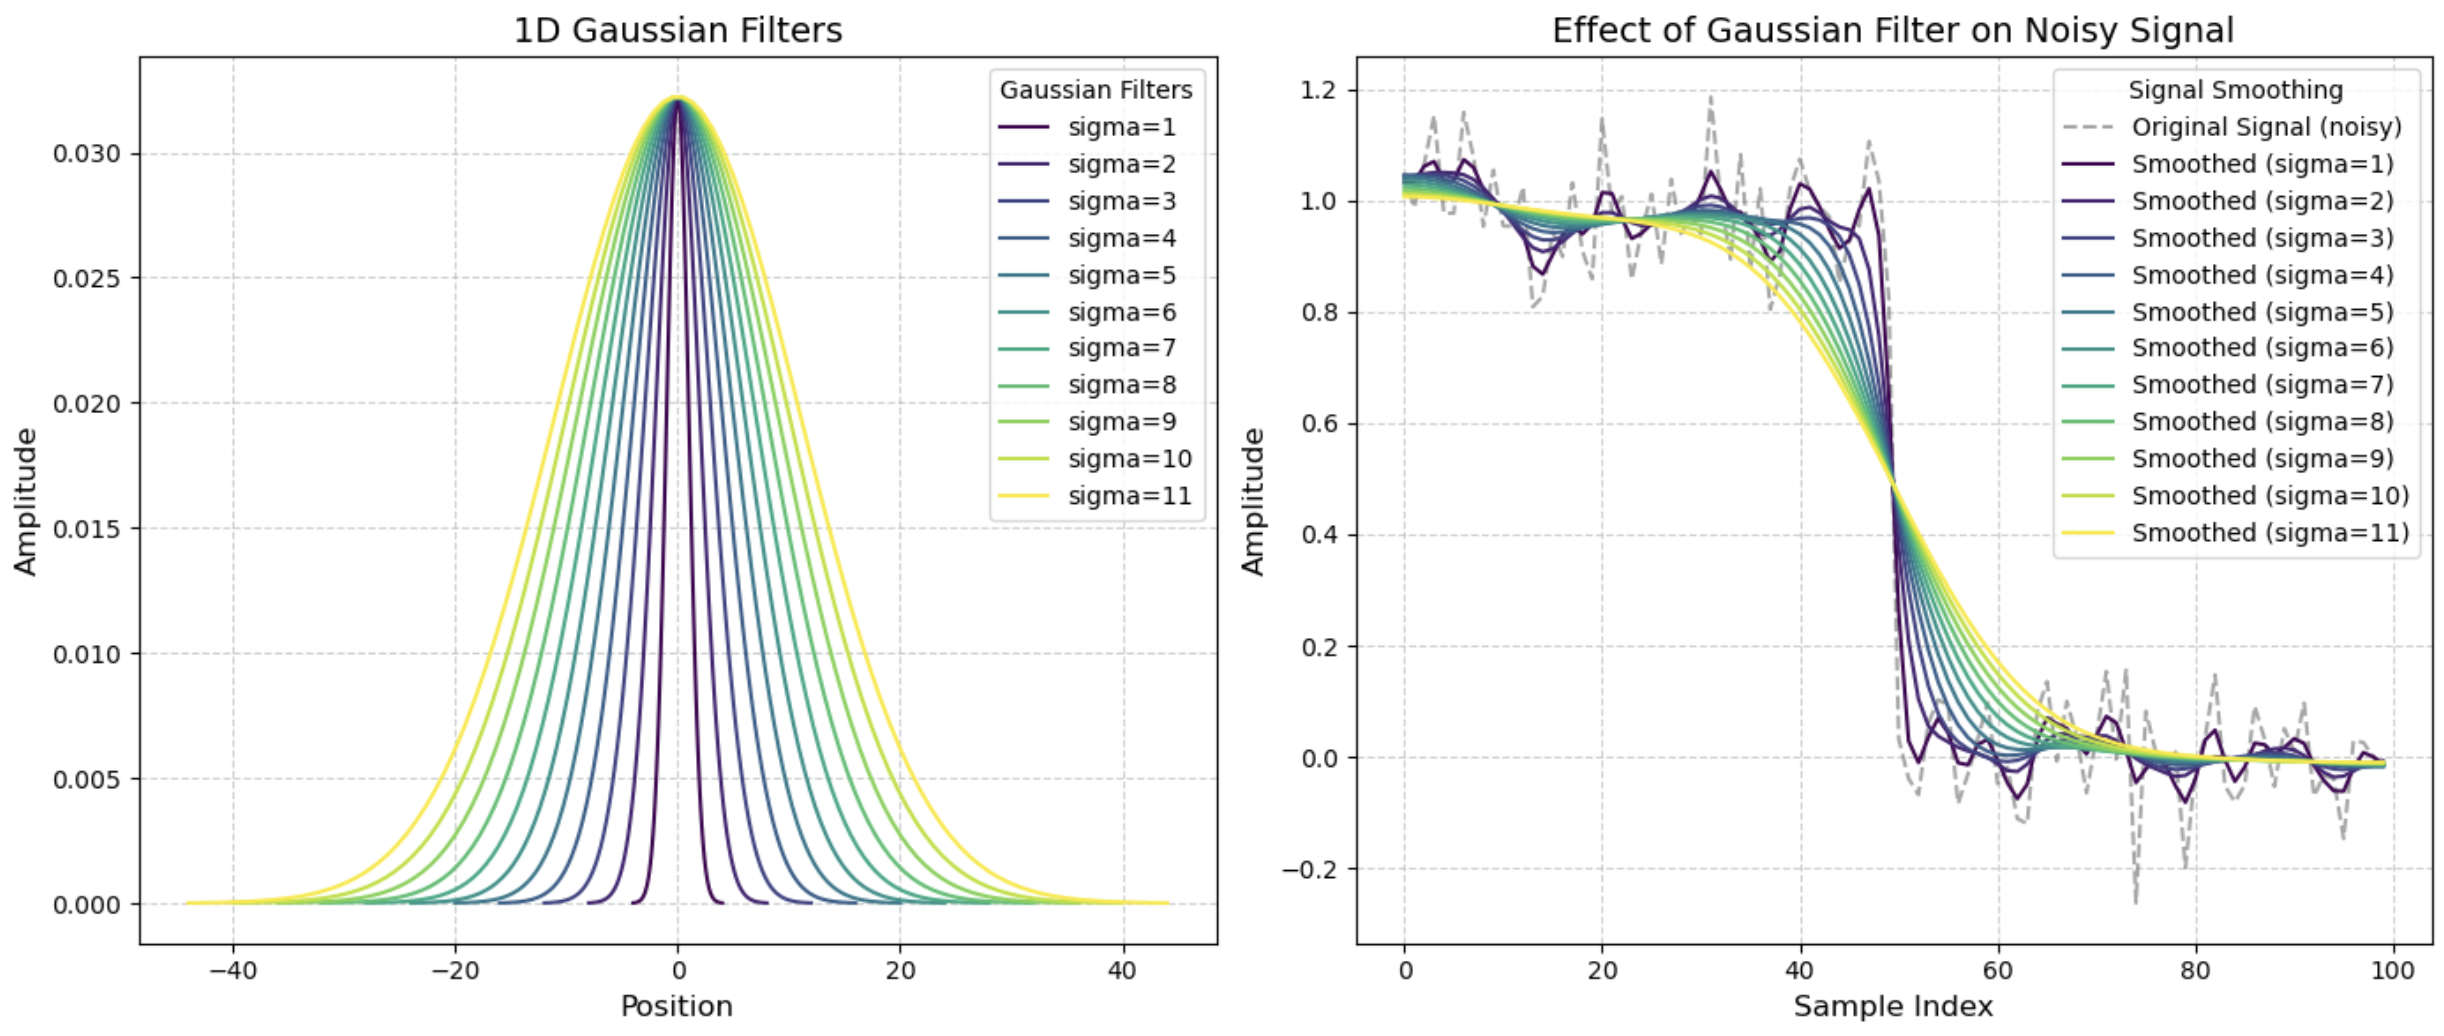

<figcaption class="figure-caption has-text-centered">Figure 2: Left: Shows the shape of the Gaussian filter for each value of sigma. Right: Demonstrates the effect of smoothing the noisy signal with each Gaussian filter.
</figcaption>
</figure>
</div>

---
**Task 2 (easy): Gaussian filter👩‍💻**
1. Reflect on the effect of applying a Gaussian filter to the data and how this can affect the subsequent proccessing of the gaze signal.


---

In [103]:
#Write your reflections here...

# The gaussian filter applies a correlation which smooths out the data and removes the noisy points, such as points where the eyes flicker.
# The different smoothed lines in the sample index (going from sigma=1 to sigma=11) show how the data is smoothed out more and more as the sigma value increases.
# We want to find a balance between smoothing out the data and keeping the important points. 
# In this case, sigma=3, 4 or 5 might seem to be a good value as it smooths out the data but still keeps the important points.


---
**Task 3 (easy): Implementing gaussian filter👩‍💻**
1. Study the function `apply_gauss`
 in the cell below.
2. Apply a Gaussian filter to the gaze data individually for `px`
and `py`
 signals. Use the function `plot_x_and_y`
 from `filtering_util.py`
 to visualize the result.    - The function takes two arrays of data as parameters.




---

Unfiltered signal


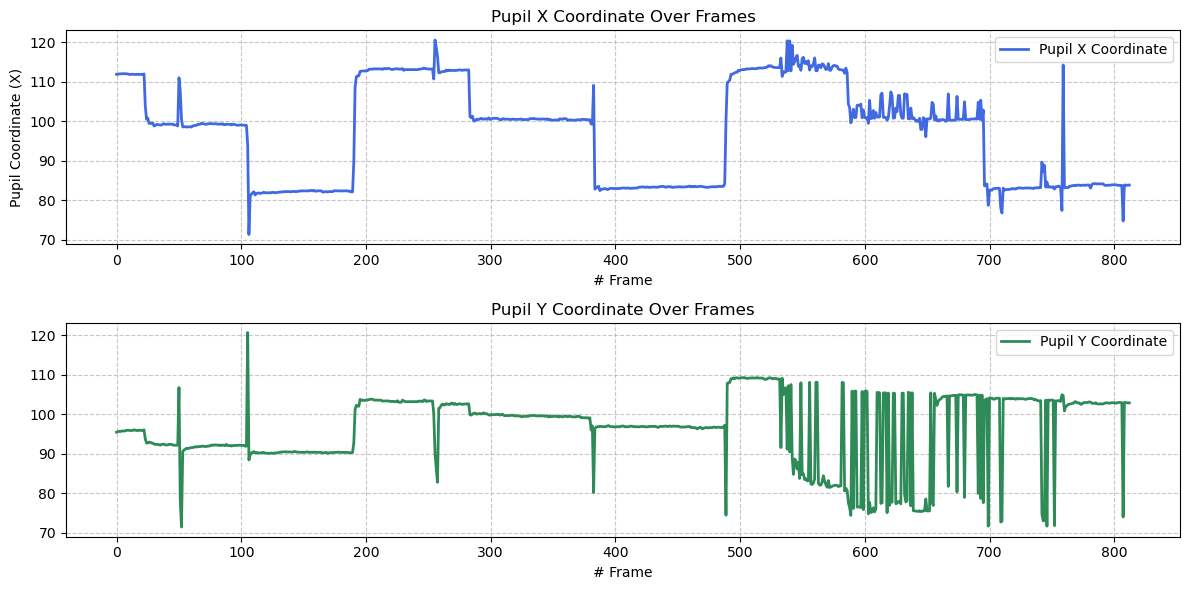

Gaussian filter with sigma = 3
Original X data at the peek between 48 and 55:
 [ 99.08834839  98.82267761 111.03864288 107.76010895 100.63835144
  98.57944489  98.61391449]
Filtered X data after applying the filter between 48 and 55. 
We can see that the datapoints have been influenced by their neighbours:
 [101.11433184 101.56683931 101.8135116  101.76780104 101.42909088
 100.88389032 100.2658716 ]


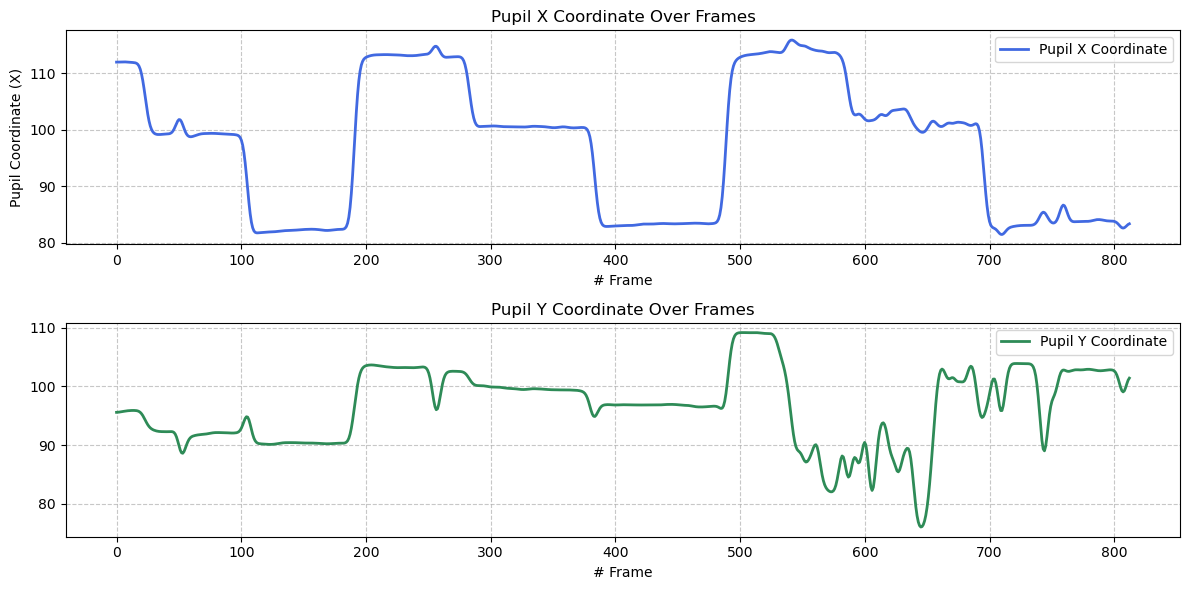

Gaussian filter with sigma = 6


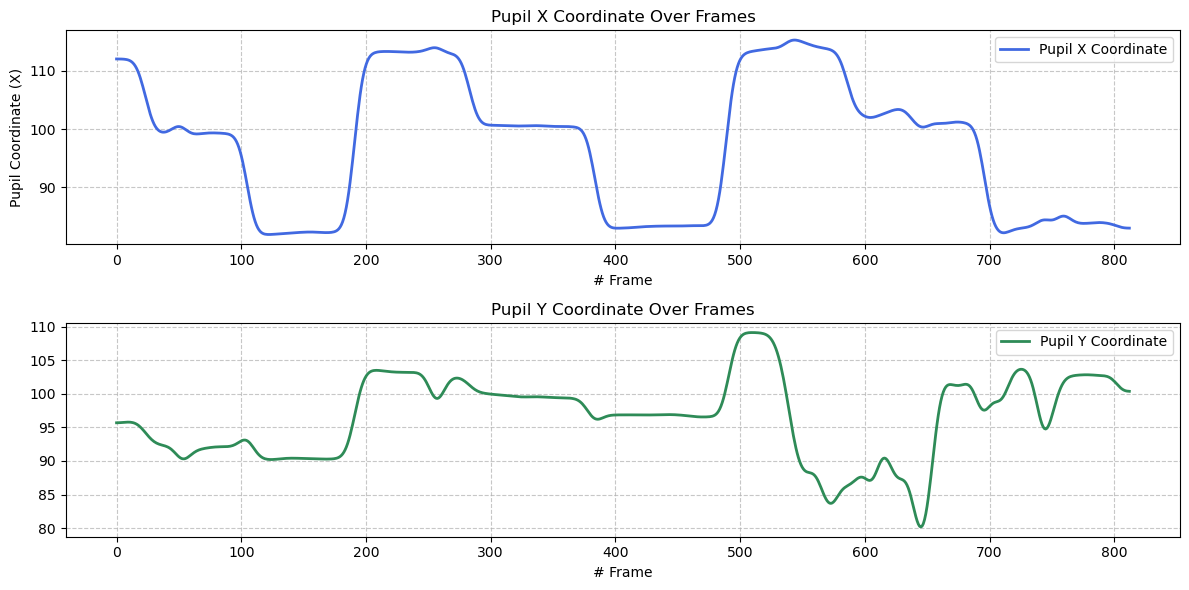

Gaussian filter with sigma = 30


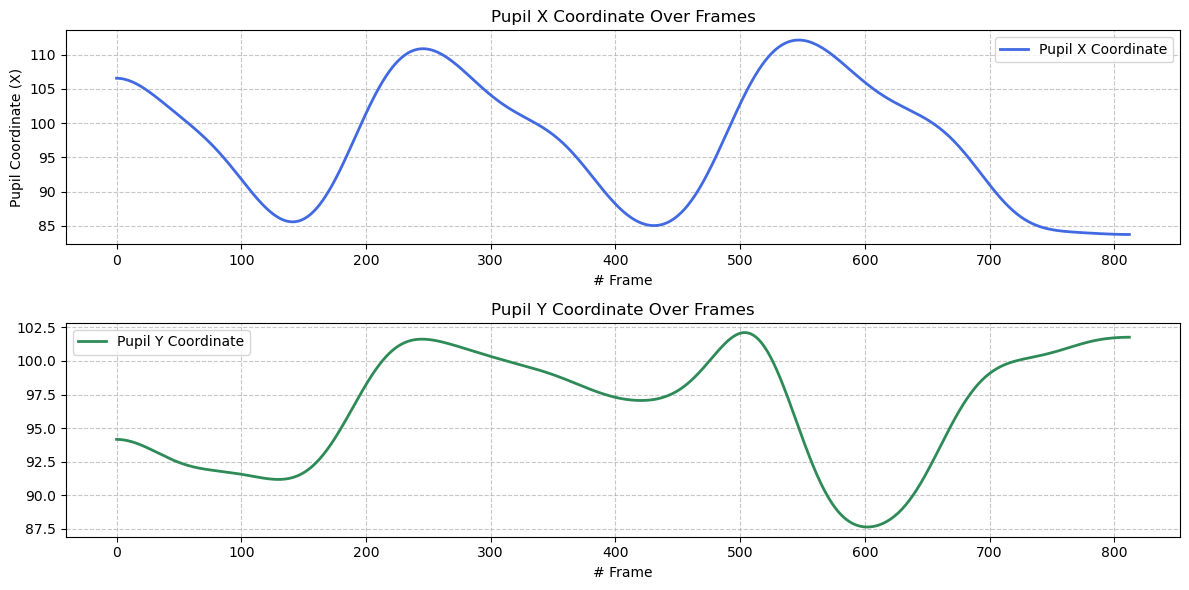

In [104]:
def apply_gauss(data, sigma = 3):
    filtered = gaussian_filter1d(data, sigma=sigma, order = 0)
    return filtered

px = np.asarray(pupil_coor['px'])
py = np.asarray(pupil_coor['py'])

# our last index shows wrong data! We need to remove it
px = px[:-1]
py = py[:-1]

print("Unfiltered signal")
filtering_util.plot_x_and_y(px, py)

# Write your implementation
print("Gaussian filter with sigma = 3")
print(f"Original X data at the peek between 48 and 55:\n {px[48:55]}")
filtered_x = apply_gauss(px)
print(f"Filtered X data after applying the filter between 48 and 55. \nWe can see that the datapoints have been influenced by their neighbours:\n {filtered_x[48:55]}")
filtered_y = apply_gauss(py)
filtering_util.plot_x_and_y(filtered_x, filtered_y)

print("Gaussian filter with sigma = 6")
filtered_x = apply_gauss(px, sigma=6)
filtered_y = apply_gauss(py, sigma=6)
filtering_util.plot_x_and_y(filtered_x, filtered_y)

print("Gaussian filter with sigma = 30")
filtered_x = apply_gauss(px, sigma=30)
filtered_y = apply_gauss(py, sigma=30)
filtering_util.plot_x_and_y(filtered_x, filtered_y)


---
**Task 4 (easy): Reflect on applying gaussian filter👩‍💻💡**
1. Experiment with the `sigma`
 parameter, which value of sigma removes the noise, but maintains the signal? 
2. For which value of `sigma`
 does the important features of the signal start to disappear?


---

In [105]:
#Write your reflections here...
# Sigma = 6 seems to be a good value as it smooths out the data but still keeps the important points.
# We can see that the data is smoothed out and that it is clear whear the general direction of the gaze is on the x-axis and on the y-axis
# However, the last three gazes have a lot of noise, as they were "supposed" to be on the same y-coordinate, but somehow this is not the case.

# As sigma increass, the data is smoothed out more and more. 
# Sigma = 30 blends the data too much and the signal starts to dissapear; it is no longer clear to see the general direction of the gaze.

## Partials derivatives

---
**Task 5 (easy): Partial derivatives💡**
1. Recall from the lecture the partial derivatives of a signal calculated by convolving using the filter `[-1, 1]`
. What would be the result of applying the derivative filter to data smoothed by a Gaussian filter? Use the following questions to guide your answers:    
    - Why does this filter find the derivative of the signal?
    - Which information is gained by applying such filter to gaze data?
    - How can the output be used for further processing?
    - What is the influence of the `sigma`
 value in the Gaussian the filter when finding the partial derivatives?




---

In [106]:
#Write your reflections here...

# By applying the [-1, 1] filter, we get a result where each data point n gets a value of -f(n) + f(n+1) which is the partial derivative.
# The filter [-1, 1] is also (very similar at least) to the Prewitt derivative filter, which is used to detect edges in the data.

# The result of applying the derivative filter to the smoothed data would be a new line that shows where there are most changes in the original signal.
# This line shows what we call "the edges" in the data, i.e. where the data changes rapidly.
# This is for example, when the x-coordinate of the gaze changes from one point to another.
# Applying such a filter would make it easier to see when the gaze changes direction, and it would be easier to see the general direction of the gaze,
# rather than looking at a line that is smoothed out.

# The sigma value in the Gaussian filter has a direct impact on the derivation filter. Consider for instance, if we have a very high sigma value, and the data is smoothed out a lot,
# then the derivative filter would not be able to detect the edges in the data, as the data is too smooth.
# On the other hand, if the sigma value is too low, then the data is not smoothed out enough, and the derivative filter would detect too many edges in the data.
# The key is to find a balance on where data is smoothed out enough, but still keeps the important points, such that the derivation filter can detect the edges in the data.

The following task is about implementing a method to find derivatives a signal using the filter $[-1, 1]$. 
The function `plot_x_and_y_complete`
 from `filter_util.py`
 takes two dictionaries one for each coordinates and plots the signals. The dictionaries should contain keys value pairs of the original and processed signal. 

---
**Task 6 (easy): Calculate the derivatives👩‍💻**
1. Complete the function `get_partial_derivatives`
 to apply the derivative filter to a signal and return the absolute value of the result. Use [np.convolve](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html)
 for convolution. The **absolute value** of the derivative is used as only the rate of change is of interest. 


---

Gaussian filter with sigma = 6
The derivatives are quite clear. 
The filtered signal is the result by applying the correlation to the data. 
The derivative signal is the result of convolving the data with a [-1, 1] filter to the cleaned data.


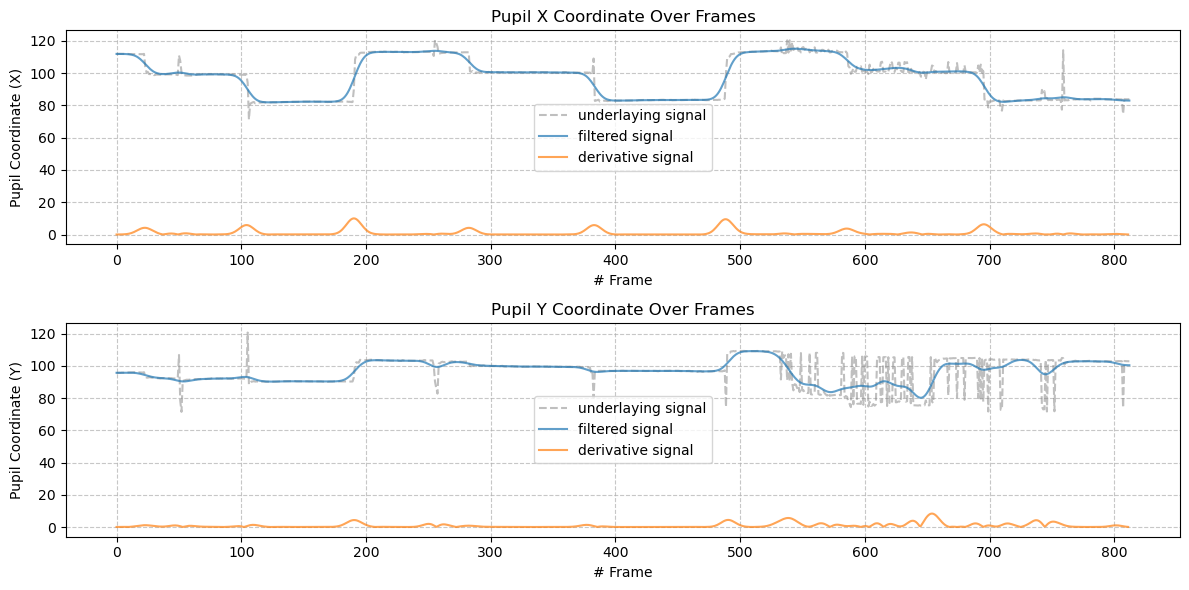

Gaussian filter with sigma = 20
The derivatives are hard to read.


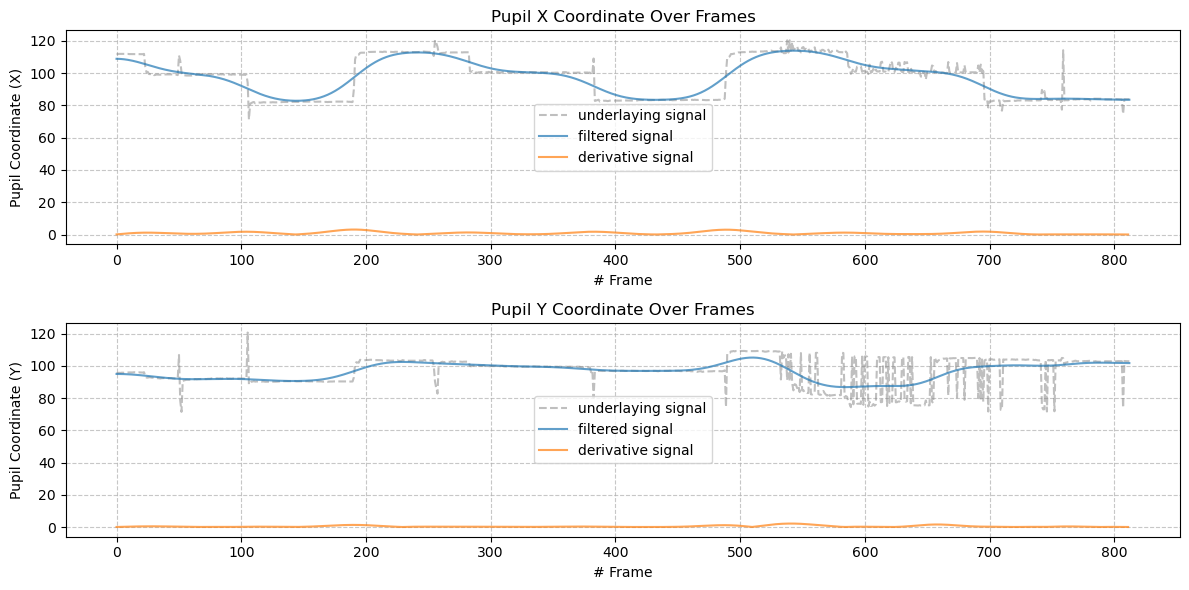

In [109]:
def get_partial_derivatives(data):
    """
    Convolve 1D data with a [-1, 1] filter.

    Args:
        data (numpy array): 1D array of data.

    Returns:
        numpy array: Convolved result.
    """
    # Write your implementation
    return abs(np.convolve(data, [-1, 1], mode='valid'))

print(f"Gaussian filter with sigma = 6\nThe derivatives are quite clear. \nThe filtered signal is the result by applying the correlation to the data. \nThe derivative signal is the result of convolving the data with a [-1, 1] filter to the cleaned data.")
# redefine the filtered data with sigma = 6
filtered_x = apply_gauss(px, sigma=6)
filtered_y = apply_gauss(py, sigma=6)

der_x = get_partial_derivatives(filtered_x)
der_y = get_partial_derivatives(filtered_y)

x_collected = {'underlaying': px, 'filtered': filtered_x, 'derivative': der_x}
y_collected = {'underlaying': py, 'filtered': filtered_y, 'derivative': der_y}

filtering_util.plot_x_and_y_complete(x_collected, y_collected)


# just for fun, let's get the derivatives of the gaussian filter with sigma = 20
# redefine the filtered data with sigma = 20
print("Gaussian filter with sigma = 20\nThe derivatives are hard to read.")
filtered_x = apply_gauss(px, sigma=20)
filtered_y = apply_gauss(py, sigma=20)

der_x = get_partial_derivatives(filtered_x)
der_y = get_partial_derivatives(filtered_y)

x_collected = {'underlaying': px, 'filtered': filtered_x, 'derivative': der_x}
y_collected = {'underlaying': py, 'filtered': filtered_y, 'derivative': der_y}

filtering_util.plot_x_and_y_complete(x_collected, y_collected)


---
**Task 7 (easy): Derivatives of a signal💡**
1. Inspect the plots above and reflect on the relation between the original signals, the filtered and the derivative of the filtered signals. In your reflections you may include:    - What charateristics in the gaze data do the peaks and plateaus encapsulate, use the data collection session to elaborate. 
    - What behaviour is expected for the `x`
 coordinate of the pupil?
    - What behaviour is expected for the `y`
 coordinate of the pupil?
    - What would happen with these if if the pattern was changed?




---

In [ ]:
#Write your reflections here...

# Recall the grid image; it was a 9 x 9 grid with 3 dots on each row.
# The behaviour for the x coordinate of the pupil is expected to have 3 x 3 "peaks" in the derivative signal line; one for each dot on the grid.
# We can see that the expected behaviour is as inteded; however, the 9th peak is not encapsulated, but this is also expected, as there isn't a sudden change in the x-coordinate of the gaze for the last dot.

# The behaviour for the y coordinate of the pupil is excpected to have 2 "peaks" in the derivative signal line; one for each time the gaze changes row (which is two times even though there are 3 rows)
# As mentioned earlier, the y coordinates have more noise, but we can see that there are in fact that there are two peaks; one at ~200 and one at ~500.
# This gives us a clearer indication on when the gaze changes row.

# If the pattern was changed, i.e. the filtered data was less smoothed out, then there would be more peeks in the derivative signal line.
# And if the filtered data was more smoothed out, then there would be less peeks in the derivative signal line.
# For example, if we used the gaussian filter with sigma = 20, then the derivative signal would be quite flattened out (see exmaple above)

The following task are about detecting events (fixations and saccades) in eye signals using derivative filters.

---
**Task 8 (easy): Saccade detection👩‍💻**
1. Complete the function `saccade_detection`
.     - The function should identify indices for large eye movement changes called _saccades_ using the derivatives of the smoothed signal.


2. Use the function `saccade_detection`
 to detect events in the derivative signal of the filtered signal of both `px`
 and `py`



---

In [ ]:

def saccade_detection(der):
    """
    Detects saccades (non-zero changes) in the derivative data.
    Parameters:
    der (1 x N numpy array): Representing the derivative of the signal.
    Returns:
    saccades (list): A list of indices where there are non-zero changes (saccades) in `x_dev`.
    """
    saccades = []
    threshold = 0.4  # Fixed threshold for detecting significant changes

    # Loop through the derivative values and detect significant changes
    for idx, value in enumerate(der):
        if abs(value) > threshold:
            saccades.append(idx)
    
    return saccades

# redefine the filtered data with sigma = 6
filtered_x = apply_gauss(px, sigma=6)
filtered_y = apply_gauss(py, sigma=6)
der_x = get_partial_derivatives(filtered_x)
der_y = get_partial_derivatives(filtered_y)

x_saccades = saccade_detection(der_x)
y_saccades = saccade_detection(der_y)



---
**Task 9 (easy): Saccade detection👩‍💻**
1. Run the cell below to visualize the detected saccades.


---

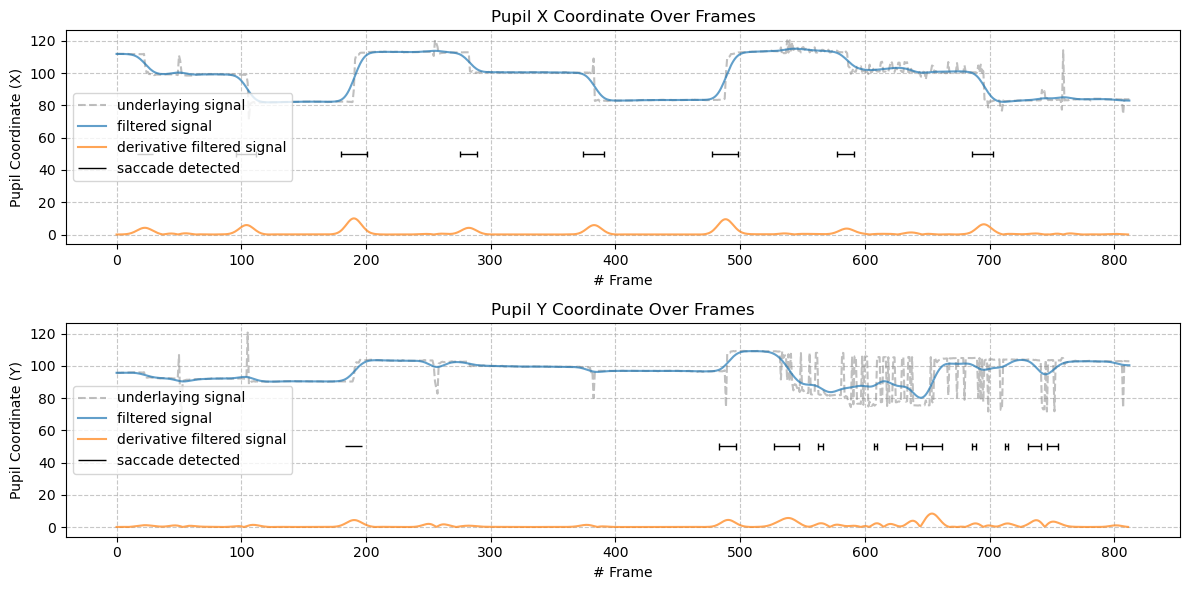

In [ ]:
x_saccade = {'underlaying': px, 'filtered': filtered_x, 'derivative filtered': der_x, 'saccade': x_saccades}
y_saccade = {'underlaying': py, 'filtered': filtered_y, 'derivative filtered': der_y, 'saccade': y_saccades}

filtering_util.plot_x_and_y_complete(x_saccade, y_saccade)



---
**Task 10 (easy): Fixation detection👩‍💻**
1. Complete the function `fixation_filtering`
 to handle noise during fixations. Select an appropriate method discussed in the lectures or draw inspiration from the experimental setup to handle noise during fixations.
2. Use the function `fixation_filtering`
 to remove the noise in the filtered signals and return cleaned signals for both `px`
 and `py`
 . 
3. Use the function `get_partial_derivatives`
 to calculate the partial derivatives of the cleaned signals.
4. Use the function `saccade_detection`
 to detect events in the derivative signal of the cleaned signal of both `px`
 and `py`
.


---

In [ ]:
# Note: I'm not completely sure if this is correct, but I believe so
# Whenever a saccade is detected, the previous valid value is used to replace the current value.
# We want to end with a cleaned list, which is the same length as the original list, but all the saccades will be replaced with the previous valid value.

def fixation_filtering(px, py, x_saccades, y_saccades):
    """
    Removes noise from the input data based on detected saccades. If a spike is detected
    at a given index, the previous valid value is used to replace the current value.

    Parameters:
        px (1 x N numpy array): Representing the x coordinates (input signal).
        py (1 x N numpy array): Representing the y coordinates (input signal).
        x_saccades (list): A list of indices where saccades are detected in the x direction.
        y_saccades (list): A list of indices where saccades are detected in the y direction.

    Returns:
        px_cleaned (list): A list of the cleaned x coordinates.
        py_cleaned (list): A list of the cleaned y coordinates.
    """
    px_cleaned = []
    py_cleaned = []
    prev_valid_x = px[0]
    prev_valid_y = py[0]
    # Iterate through the input data starting from index 1
    for i in range(len(px)):

        # If a saccade is detected, use the previous valid value
        if i in x_saccades:
            px_cleaned.append(prev_valid_x)
            
        else:
            px_cleaned.append(px[i])
            prev_valid_x = px[i]

        if i in y_saccades:
            py_cleaned.append(prev_valid_y)

        else:
            py_cleaned.append(py[i])
            prev_valid_y = py[i]
            
    return px_cleaned, py_cleaned
    

# Applying fixation filtering on px and py data based on saccades
cleaned_px, cleaned_py = fixation_filtering(px, py, x_saccades, y_saccades)

# Recalculate derivatives after filtering
der_x_cleaned = get_partial_derivatives(cleaned_px)
der_y_cleaned = get_partial_derivatives(cleaned_py)

# Detect saccades again on the cleaned data
x_saccades_cleaned = saccade_detection(der_x_cleaned)
y_saccades_cleaned = saccade_detection(der_y_cleaned)


---
**Task 11 (easy): Visualization of signals👩‍💻**
1. Run the cell below to visualize the fixations and saccades.


---

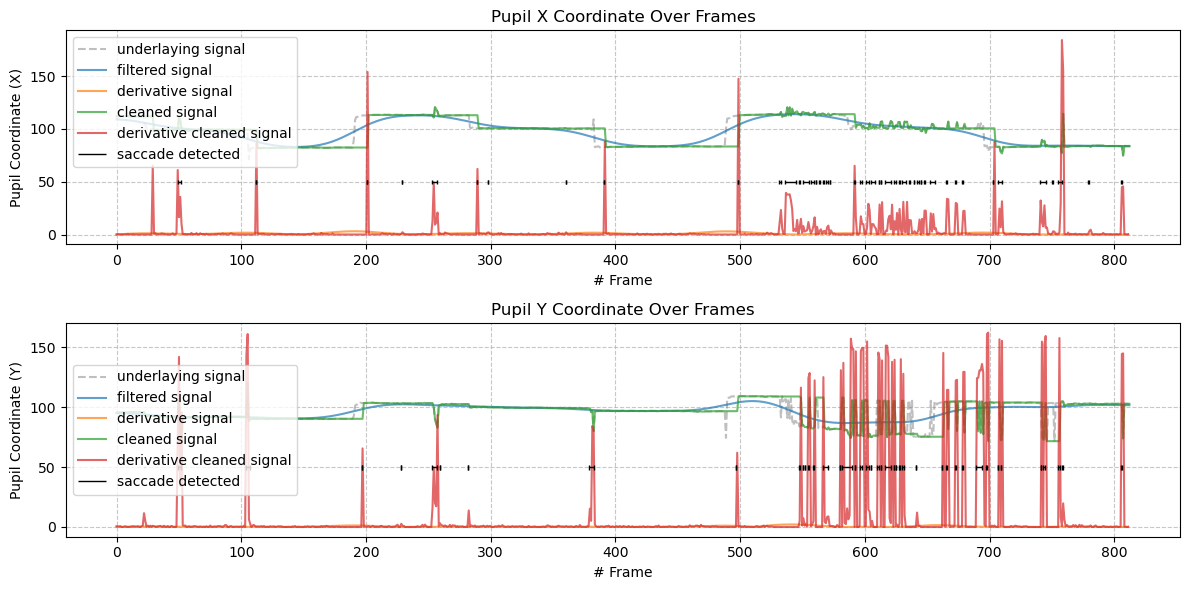

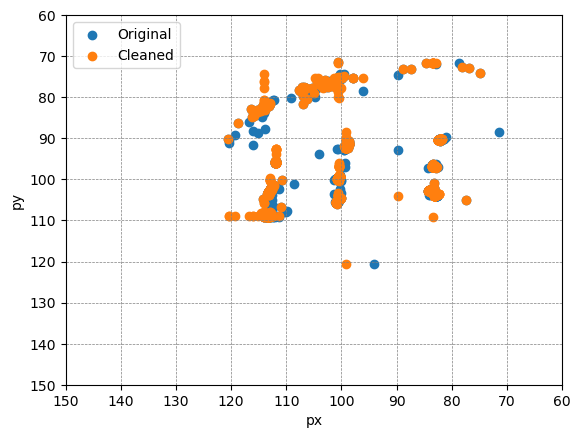

In [ ]:
x_collected['cleaned'] = cleaned_px
y_collected['cleaned'] = cleaned_py

x_collected['derivative cleaned'] = der_x_cleaned
y_collected['derivative cleaned'] = der_y_cleaned

x_collected['saccade detected'] = x_saccades_cleaned
y_collected['saccade detected'] = y_saccades_cleaned

filtering_util.plot_x_and_y_complete(x_collected, y_collected, 5) #5 is a scaling factor on the values of the derivative for display purposes
filtering_util.plot_pupil_coor(px, py, 'Original')
filtering_util.plot_pupil_coor(cleaned_px, cleaned_py, 'Cleaned')
plt.show()


---
**Task 12 (easy): Noise handling during fixations💡**
1. Reflect on the assumptions of your method for handling noise during fixations in [Task 10](#fixations1). What are the advantages and limitations of your approach if any?
2. Reflect on other strategies that you could use for handling the noise and outliers in the gaze data.


---

In [ ]:
#Write your reflections here...

# I'm not sure if I solved this exercise correctly, but what I did was that I simply removed the saccades from the data and replaced them with the previous valid value.

# This results in the green line, which drops rapidly instead of dropping "smoothly".
# This makes it easier to detect when the gaze changes direction, as the green line is more "jagged" than the blue line.

# I think the idea actually is to apply the gaussian filter to the cleaned data, but I decided to skip this since "fixations" has not been covered in lectures
# and is not something to be answered in the oral exam..

The next step is to utilize the charateristics of the derivative of the smoothed signal to detect the frames (pupil coordinates) corresponding to each screen calibration point, so the data can be sorted in corresponding input and label pairs.

---
**Task 13 (easy): Frame grouping👩‍💻**
1. Complete the function `get_frames_pupil_movement`
. The function should:    - Construct a dictionary where the keys represent the calibration point numbers (e.g., '0', '1', ..., '8'), and the associated values are tuples consisting of the start and end frame numbers.


2. Use the function `get_frames_pupil_movement`
 to determine the sections pupil corrdinate sections belonging to each calibration coordinate.


---

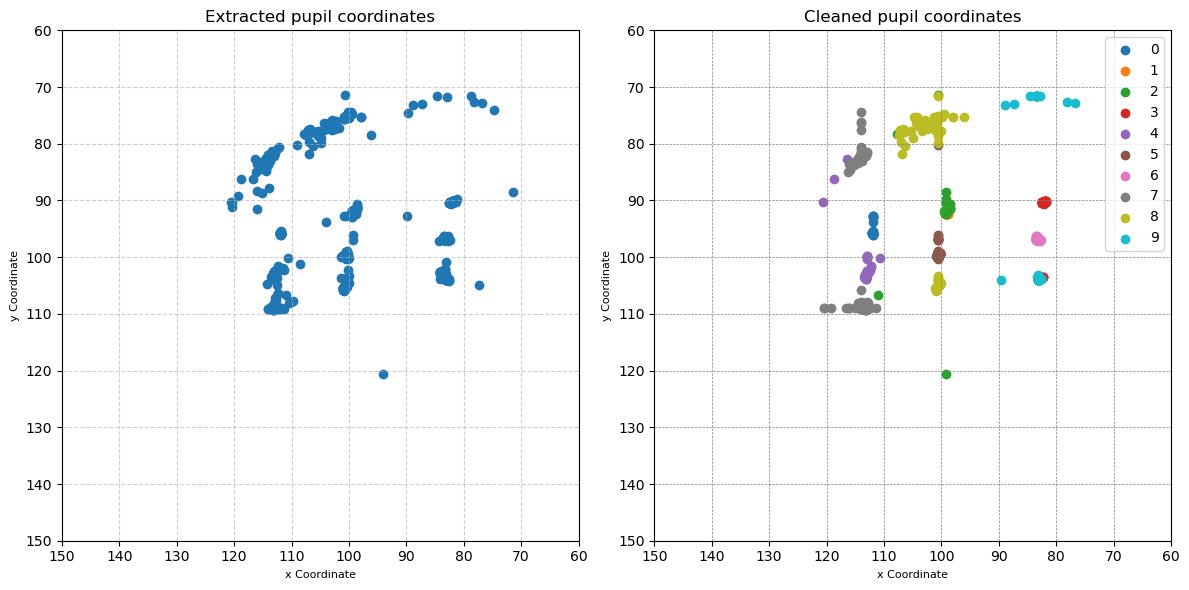

In [ ]:
def get_frames_pupil_movement(cleaned_der, cleaned):
    """
    Identifies segments of pupil movement based on changes in the cleaned derivative.

    Parameters:
        cleaned_der (list or numpy array): A 1D array of the derivative values of the cleaned data, indicating changes in pupil position over time.
        data (list or numpy array): The original data corresponding to the pupil movement.

    Returns:
        dict ( {string: tuple(int, int)} ): A dictionary where the keys are calibration point numbers (as strings) and the values are tuples
              containing the start and end frame numbers for each segment.
    """
    
    saccades = saccade_detection(cleaned_der)
    frames = {}
    movement_detected = False
    start_frame = 0
    threshold = 10  
    
    # Iterate through the cleaned derivative to detect changes
    for i in range(len(cleaned)):
        movement = i in saccades and cleaned_der[i] > threshold
        if not movement and movement_detected :
            # Start of a new fixation
            start_frame = i
            movement_detected = False
        elif movement and not movement_detected:
            # End of the fixation
            end_frame = i
            calibration_point = f"{len(frames)}"  # Create a calibration point key
            frames[calibration_point] = (start_frame, end_frame)  # Store the segment
            movement_detected = True

    # If movement was detected but the loop ends without detecting the end, add the last movement
    if movement_detected:
        calibration_point = f"{len(frames)}"
        frames[calibration_point] = (start_frame, len(cleaned_der) - 1)

    return frames

# Example usage
frames = get_frames_pupil_movement(der_x_cleaned, cleaned_px)
# Plotting the pupil coordinates with the movement frames
filtering_util.plot_pupil_coordinates(frames, px, py, cleaned_px, cleaned_py)

# Note: The cleaned pupil coordinates detected are 10, but they are "supposed" to be 9, as there are 9 dots on the grid. I don't know why..

## Analyzing results
In the following tasks the results of the filtering will be analyzed using _mean_, _variance_ and _covariance_ at each calibration target for both raw data and filtered data.

---
**Task 14 (easy): Analyse results👩‍💻**
1. Run the cell below to visualize the mean, variance and covariance of the data before and after processing.


---

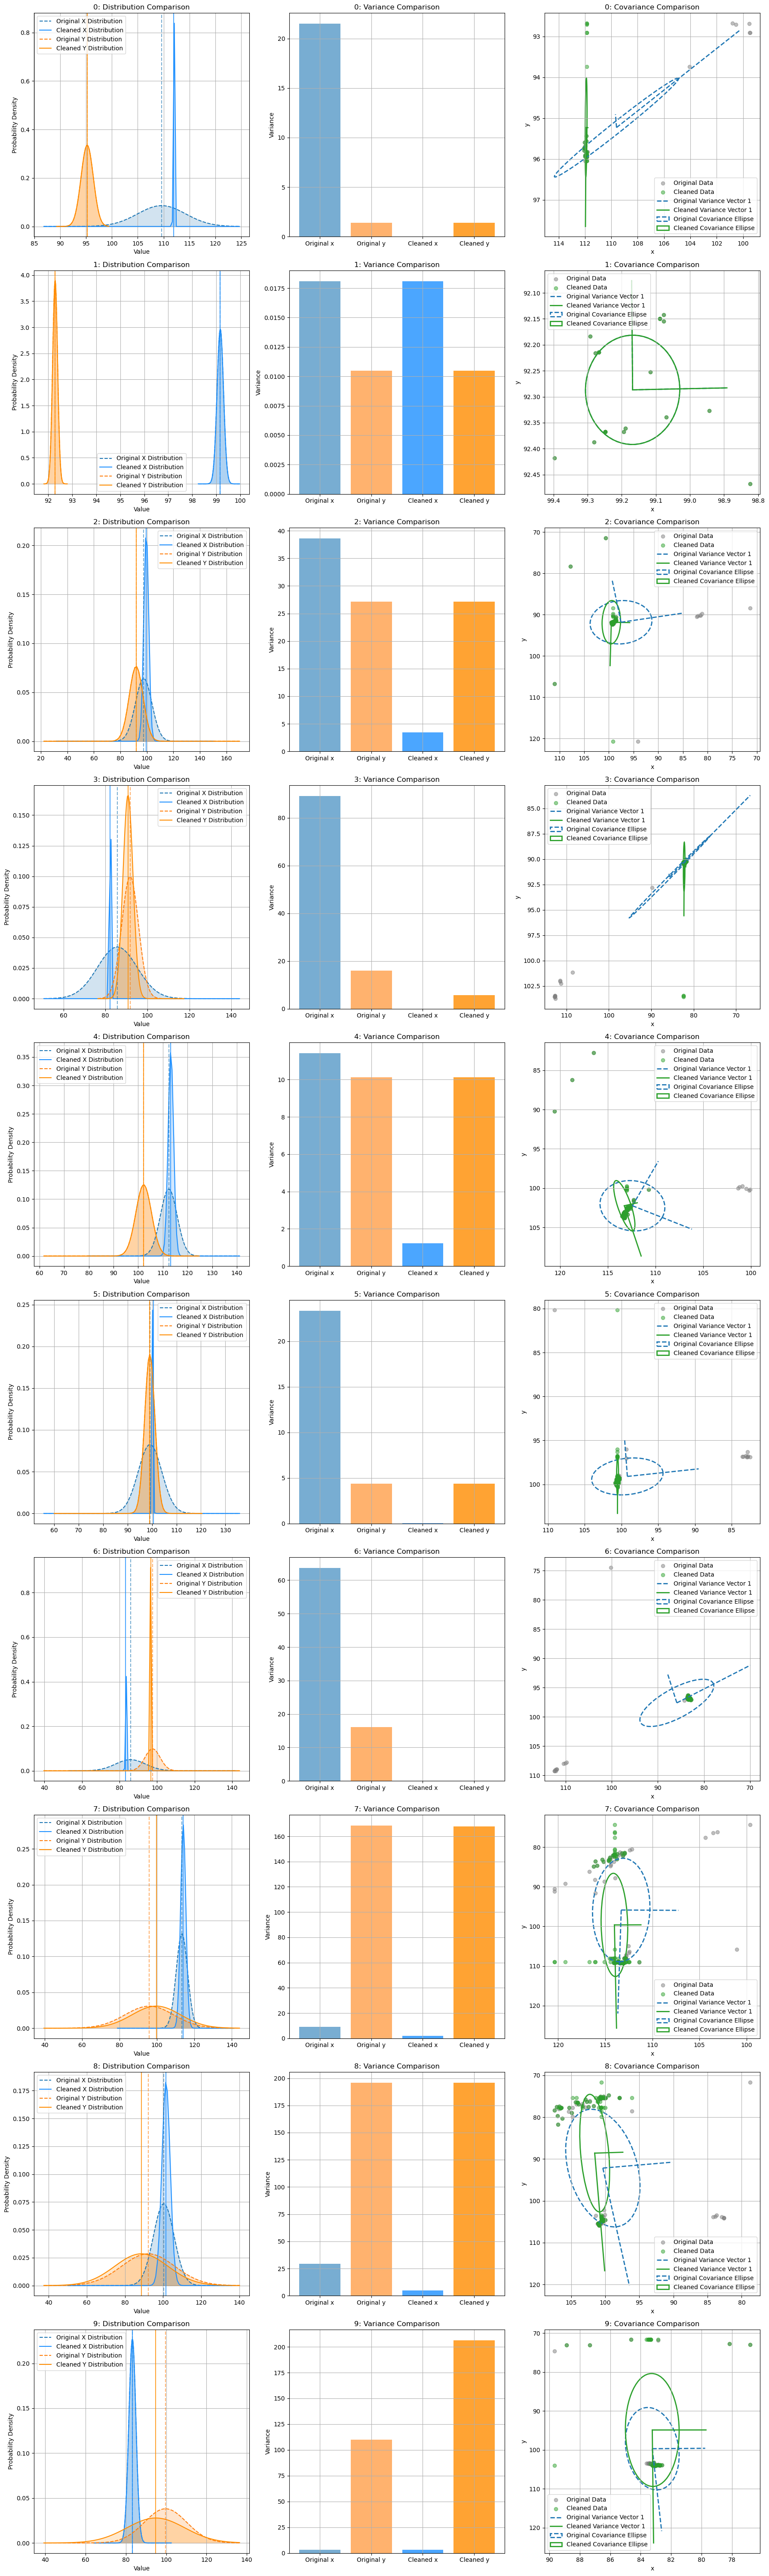

In [ ]:
filtering_util.plot_statistics_comparison(px, py, cleaned_px, cleaned_py, frames)


---
**Task 15 (easy): Reflect💡**
1. Reflect on the results visualized in the plots.    
    - What effect does cleaning the data have on the mean and variance?         
        - Use your reflection from [Task 12](#fixation3) and reevaluate your choice of strategy, has it changes the underlaying signal in terms of mean and variance? Why? Why not? 
    - If any target points stands out, why? Relate to the experiment setup and the pupil detection method. 

In [ ]:
# Write your reflections here...

# In most of the points (point 1), we can see an improvement in the varience. Recall that high variance in the data often corresponds to more noise, making it harder for a model to learn meaningful patterns.
# So it is good that we managed to reduce the variance for the cleaned x data.
# For the cleaned y data, the variance is unchanged for most of the points. It is only for point 3 and 6 where we see a decrease in the variance.
# In point 9 the variance is increased, which is not good, as it means that the data is more noisy than before. 

# I discussed the solution with some other students, and we found out that the bad outcome is because of a wrong implementation of the fixation_filtering function.
# Instead of just replacing the saccades with a previous value, we should have applied the gaussian filter to the data, to figure out the general direction of the gaze.
# So we should have used the np.convolve function before appending the data to the cleaned list.
# --- Due to lack of time this was not implemented correctly!

# Although the solution is not completely correct, I believe this exercise has demonstrated how to apply Gaussian filters and derivative filters to data
# and what the impact of this is; namely a more "clean" dataset, that doesn't contain as much noise as the original data.
# A (proper) cleaning of the data would reduce the variance, which would make it easier for a model to learn meaningful patterns in the data.

## Inspecting own data


---
**Task 16 (medium): Combined signal👩‍💻💡**
1. Go back to [Task 1](#task_load_data) and update the folder path to target the `grid`
 pattern of your own data.
2. Rerun the steps above.
3. Reflect on how well does the method generalizes to this dataset. You may use the following questions to guide your answers?    - How do the results differ from the ones of `test_subject_3`
?
    - Is it possible to reuse the same parameters or do they need to be updated?
    - Has the experimental setup any influence on the methods ability to generalizable? Why/why not?




---

In [ ]:
# Write your reflections here...

# This was fun to do on my own gaze. The model performed quite well, but it was clear that the sigma value in the Gaussian filter had to be adjusted to get the best result.
# For my gaze, it should have been lower than 6, because using sigam = 6 made the data too smooth, and the model couldn't detect the edges in the data properly.

## Event detection using gradients
In this task you will explore the combined signal (changes in x and y direction simultainously) and use the gradient for event detection. Recall the definition for the gradient of the function $f(x,y)$:

$$

\nabla f(x, y) = \left( \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right)


$$

You will use the gradient magnitude, the length of the gradient defined by:

$$
||\nabla f(x, y)|| = \sqrt{\Big(\frac{\partial f(x,y)}{\partial x}\Big)^2 + \Big(\frac{\partial f(x,y)}{\partial y} \Big)^2}
$$

---
**Task 17 (easy): Combined signal👩‍💻**
1. Complete the functions:    - `gradient_mangitude`
: The function should calculate the gradient magnitude of a $2D$ signal given `x`
 and `y`
.




---

In [ ]:
# NOT IMPLEMENTED - BUT REFLECTED UPON

def gradient_mangitude(x,y):
    """
    Calculates the gradient mangitude in a 2D space.
    Args:
        x (N x 1 numpy array): Array of x coordinates.
        y (N x 1 numpy array): Array of y coordinates.
    
    Returns:
        (N x 1 numpy array): The Euclidean distance from the origin to the point (x, y).
    """
    # Write your implementation

magnitude = gradient_mangitude(der_x, der_y)
magnitude_cleaned = gradient_mangitude(der_x_cleaned, der_y_cleaned)

collected_signal = {}
collected_magnitude = {}
collected_signal['x'] = px
collected_signal['y'] = py
collected_signal['x cleaned'] = cleaned_px
collected_signal['y cleaned'] = cleaned_py
collected_magnitude['magnitude of gradient'] = magnitude
collected_magnitude['magnitude of gradient cleaned'] = magnitude_cleaned

#filtering_util.plot_x_and_y_complete(collected_signal, collected_magnitude, 5) #5 is a scaling factor on the values of the derivative for display purposes


---
**Task 18 (easy): Reflect💡**
1. Reflect on the benefit of using the combined signal compared to using the two individual signals.


---

In [0]:
# Write your reflection here...

# Although this task was not implemented I will reflect upon the task.
# Using the combined signal compared to using the two individual signals will give what we call a "gradient". This gradient is the
# derivatives of both the X and Y coordinates combined. This will give us a better understanding of when the gaze changes direction
# in both x and y coordinates; instead of just inspecting them seperately, we combine them into one, and we can inspect the changes.
# We can clearly wee the spikes in the yellow line, which indicates when the pupil moves from one grid point to another.
# (Use Dan's image as an example - it's plotted below and in the data folder)

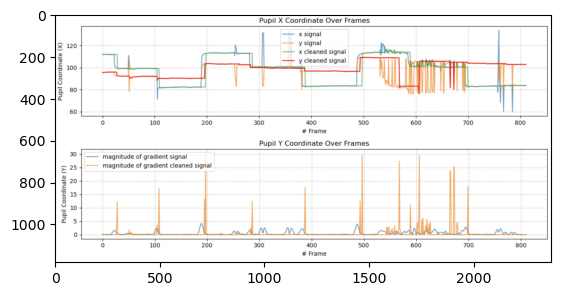

In [ ]:
# plot a image
image = mpimg.imread('data/Dan-gradients.png')
plt.imshow(image)